In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [459]:
drone_cust_locations = pd.read_csv('../datasets/drone_cust_locations.csv', sep=';')

drone_cust_locations.head()

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


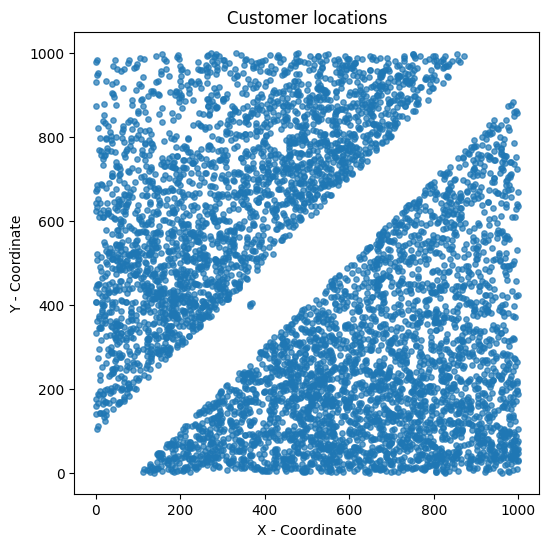

In [460]:
plt.figure(figsize=(6, 6))
plt.scatter(drone_cust_locations["x"], drone_cust_locations["y"], s=15, alpha=0.7)
plt.xlabel("X - Coordinate")
plt.ylabel("Y - Coordinate")
plt.title("Customer locations")
plt.show()

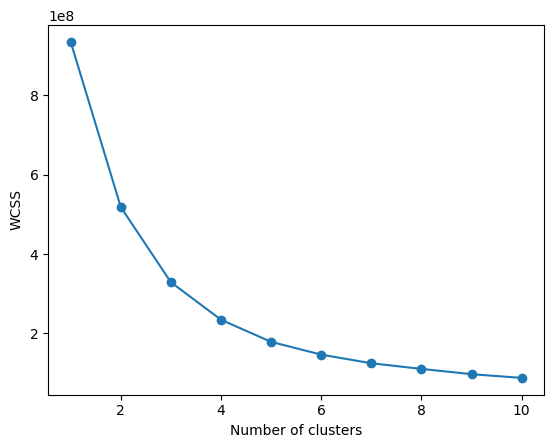

In [461]:
wcss = []
for i in range(1,11):
    model = KMeans(init='random', n_clusters=i, random_state=42).fit(drone_cust_locations[["x", "y"]])
    wcss.append(model.inertia_)
    
plt.plot(range(1,11), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [462]:
k = 3
kmeans =  KMeans(n_clusters=k, random_state=42)
drone_cust_locations['depot'] = kmeans.fit_predict(drone_cust_locations[["x", "y"]])
centroids = kmeans.cluster_centers_

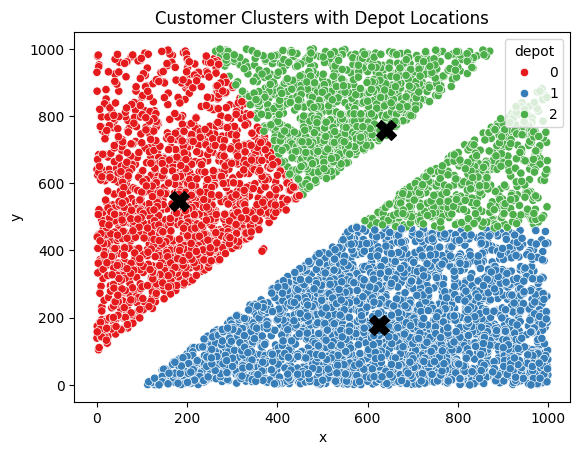

In [463]:
sns.scatterplot(data=drone_cust_locations, x="x", y="y", hue="depot", palette="Set1")
plt.scatter(centroids[:,0], centroids[:,1], 
            c='black', s=200, marker='X')
plt.title("Customer Clusters with Depot Locations")
plt.show()

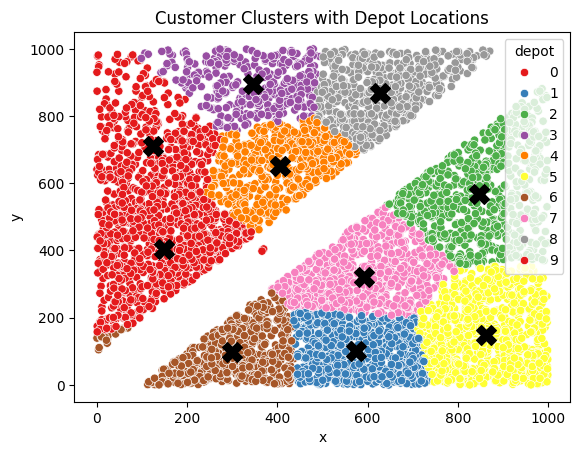

In [464]:
k = 10
kmeans =  KMeans(n_clusters=k, random_state=42)
drone_cust_locations['depot'] = kmeans.fit_predict(drone_cust_locations[["x", "y"]])
centroids = kmeans.cluster_centers_
sns.scatterplot(data=drone_cust_locations, x="x", y="y", hue="depot", palette="Set1")
plt.scatter(centroids[:,0], centroids[:,1], 
            c='black', s=200, marker='X')
plt.title("Customer Clusters with Depot Locations")
plt.show()

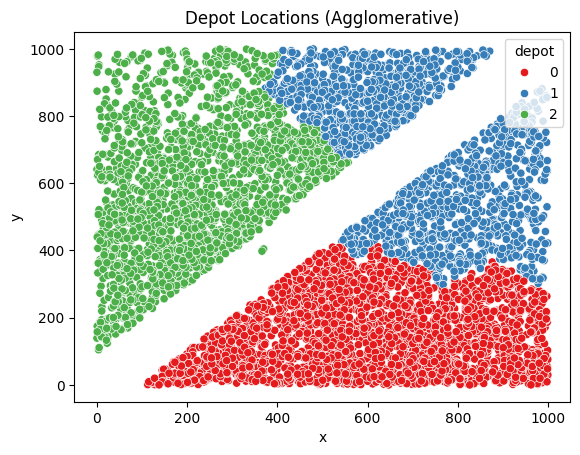

In [465]:
clustering = AgglomerativeClustering(n_clusters=3)
drone_cust_locations['depot'] = clustering.fit_predict(drone_cust_locations[["x", "y"]])
sns.scatterplot(data=drone_cust_locations, x="x", y="y", hue="depot", palette="Set1")
plt.title("Depot Locations (Agglomerative)")
plt.show()

In [466]:

df = pd.read_csv('../datasets/drone_prod_groups.csv', sep=',')
df = df.drop(columns=['ID'])
df.head()


,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10,Prod11,Prod12,Prod13,Prod14,Prod15,Prod16,Prod17,Prod18,Prod19,Prod20
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1


In [467]:
df = df.astype(bool)
df.head()

,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10,Prod11,Prod12,Prod13,Prod14,Prod15,Prod16,Prod17,Prod18,Prod19,Prod20
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True


In [468]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)


frequent_itemsets

,support,itemsets
0,0.10998,(Prod1)
1,0.13098,( Prod2)
2,0.10459,( Prod5)
3,0.13499,( Prod7)
4,0.16179,( Prod8)
5,0.19853,( Prod9)
6,0.09336,( Prod10)
7,0.10848,( Prod11)
8,0.15971,( Prod12)
9,0.14557,( Prod14)


In [469]:

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by="confidence", ascending=False)
print(rules.head())

  antecedents consequents  antecedent support  consequent support  support  \
1   ( Prod15)    ( Prod9)             0.11880             0.19853  0.11145   
3   ( Prod20)   ( Prod19)             0.14798             0.20626  0.13476   
2   ( Prod19)   ( Prod20)             0.20626             0.14798  0.13476   
0    ( Prod5)   ( Prod12)             0.10459             0.15971  0.06683   

   confidence      lift  representativity  leverage  conviction  \
1    0.938131  4.725388               1.0  0.087865   12.954372   
3    0.910664  4.415125               1.0  0.104238    8.884845   
2    0.653350  4.415125               1.0  0.104238    2.457869   
0    0.638971  4.000822               1.0  0.050126    2.327488   

   zhangs_metric   jaccard  certainty  kulczynski  
1       0.894663  0.541335   0.922806    0.749754  
3       0.907849  0.613997   0.887449    0.782007  
2       0.974508  0.613997   0.593144    0.782007  
0       0.837662  0.338431   0.570352    0.528709  
